<h2 class="border-round" style="background: linear-gradient(to right, #98929F, #D3ACB5 ,#D3C7D3, #EFEAF0); padding: 20px 0 20px 35px;"><span style="font-size: 25pt;"><strong><span style="color: magenta;">Assignment Four: Qualitative Variables</span></strong></span></h2>
<hr style="border-top: 6px solid #0C5A5C; margin: 30px auto;" />

    

# Labor markets and returns to schooling
For this problem you will use the dataset supplied via Canvas, filename: “card.dta”, which is taken from Card, David (1995) “Using Geographic Variation in College Proximity to Estimate the Returns to Schooling," in Aspects of Labour Market Behavior: Essays in Honour of John Vanderkamp, ed. L. H. Christophides, E. K. Grand, and R. Swidinsky. Toronto: University of Toronto Press: 201-222. The data measure a variety of characteristics of individuals and include data on the proximity of two- and four-year colleges.

Familiarize yourself with the data based on the accompanying PDF of Card’s working paper (look it up online, it is a old but good paper). Note where the data are originally from, what kind of sampling was involved, and the units of observation.

Pay particular attention to the following variables and ensure you know what they measure and in what units: wage, educ, exper, exper2. You may have to infer the units of measurement from the variable distributions. 

For your writeup, present a table that shows sample means, standard deviations, and minimum/maximum values for the wage, educ, exper variables (call this Table 1). In a note to this table, say how many observations are in the dataset and how many variables there are. Also present a scatter plot of wage by education in a way you think makes sense. Call this Figure 5.

Run the following regressions:

Specification 1: $ln⁡(wage)=\beta_0+\beta_1 (educ)+u_i$ 

Specification 2: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+u_i$

Specification 3: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+\beta_3 (expersq)+u_i$

Specification 4: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+u_i$

Specification 5: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+\beta_5(black)+u_i$ 

* For the married variable show two different ways of creating a dummy variable to incorporate it in your regression. The new variables is such that 1 is married and 0 otherwise. Make your dummy based on the description from this [link](https://usa.ipums.org/usa-action/variables/MARST#codes_section) married only counts when spouse present. 

* Present a regression output table (Table 2). Below the set of tables, provide discussion of the parameter estimates for Specification 5 (interpret the fitted values for $\beta_0$,$\beta_1$,$\beta_2$,$\beta_3$,$\beta_4$,$\beta_5$). Comment on any major changes you see between Specification 5 and Specification 2.

* When a worker gains one more year of experience, by how much is the wage expected to increase, on average? Discuss differences in the parameter estimates in specifications 2 and 3. (Hint: Take the derivative of each with respect to experience.)

* State the first two algebraic properties of the OLS estimator. Verify that these properties hold in Specification 1 and Specification 5. *(Hint: You will be able to do this by predicting the residuals into the data, and then using the “sum” function on the variables.)*

**All your models should be presented only in a stargazer table. Make sure you do that part before this homework.** 

**Do your best to NOT use AI for this assignment but be honest stating if you do.**


# Assignment 4: By Michael Zhao

## Get the packages

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
pd.options.display.float_format = '{:.3f}'.format

## Get data


In [73]:
returns = pd.read_stata('card.dta' )

## Explore the data

In [74]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3010 non-null   int16  
 1   nearc2    3010 non-null   int8   
 2   nearc4    3010 non-null   int8   
 3   educ      3010 non-null   int8   
 4   age       3010 non-null   int8   
 5   fatheduc  2320 non-null   float64
 6   motheduc  2657 non-null   float64
 7   weight    3010 non-null   float32
 8   momdad14  3010 non-null   int8   
 9   sinmom14  3010 non-null   int8   
 10  step14    3010 non-null   int8   
 11  reg661    3010 non-null   int8   
 12  reg662    3010 non-null   int8   
 13  reg663    3010 non-null   int8   
 14  reg664    3010 non-null   int8   
 15  reg665    3010 non-null   int8   
 16  reg666    3010 non-null   int8   
 17  reg667    3010 non-null   int8   
 18  reg668    3010 non-null   int8   
 19  reg669    3010 non-null   int8   
 20  south66   3010 non-null   int8

In [76]:
# We are going to make the table with some statistics properties of wage, educ and exper
summary = returns[['wage', 'educ', 'exper']].agg(['mean', 'std', 'min', 'max']).T
summary.columns = ['Mean', 'Standard Deviation.', 'Minimum', 'Maximum']
display("Table1: Summary statistics of wage, educ and exper")
display(summary)

'Table1: Summary statistics of wage, educ and exper'

,Mean,Standard Deviation.,Minimum,Maximum
wage,577.282,262.958,100.000,2404.000
educ,13.263,2.677,1.000,18.000
exper,8.856,4.142,0.000,23.000


<p>
  The working file contains <strong>3,010 individuals</strong> described by
  <strong>34 variables</strong>. Most columns are 0/1 indicators (stored as
  <code>int8</code>)—regional dummies (<code>reg66*</code>), family‑structure flags at age 14,
  and race (<code>black</code>). Core continuous measures include hourly <code>wage</code>
  (integer cents), years of schooling <code>educ</code> (0–18), and potential experience
  <code>exper</code> plus its square. Parental education (<code>fatheduc</code>,
  <code>motheduc</code>) and cognitive scores (<code>iq</code>, <code>kww</code>) have some missing values,
  but the labor‑market variables we use are complete. 
</p>


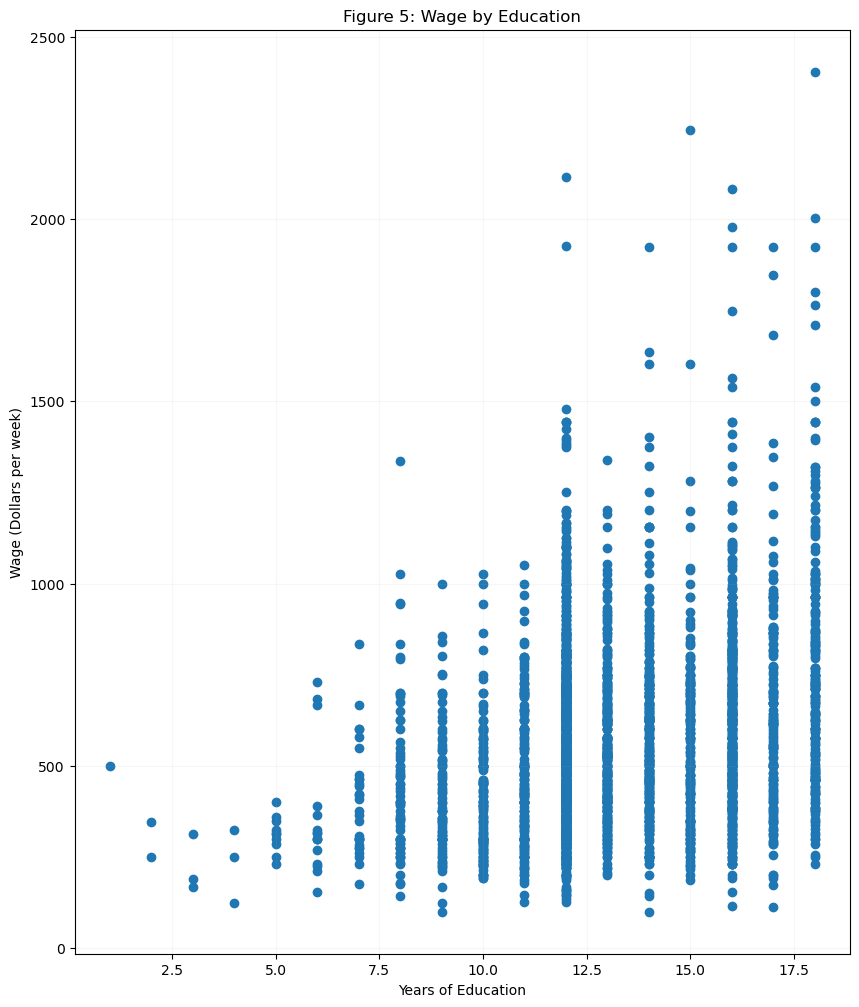

In [ ]:
# We are going to make a scatter plot of wage and educ
plt.figure(figsize=(10,12))
plt.scatter(returns['educ'], returns['wage'])
plt.xlabel('Years of Education')
plt.ylabel('Wage (Dollars per week)')
plt.title('Figure 5: Wage by Education')
plt.grid(alpha=0.1)

<p>
    Simply using <code>wage</code> and <code>educ</code> is a bad idea, a handful of very high earners stretch the scale, compressing the bulk of the data into a narrow band and making visual patterns hard to see. To make the figure better, we took the log of <code>wage</code>, as usually wages rise at an approximate constant percentage per year of schooling, and it would look better.
</p>

In [ ]:
# We are gonna make lwage
returns['lwage'] = np.log(returns['wage'])

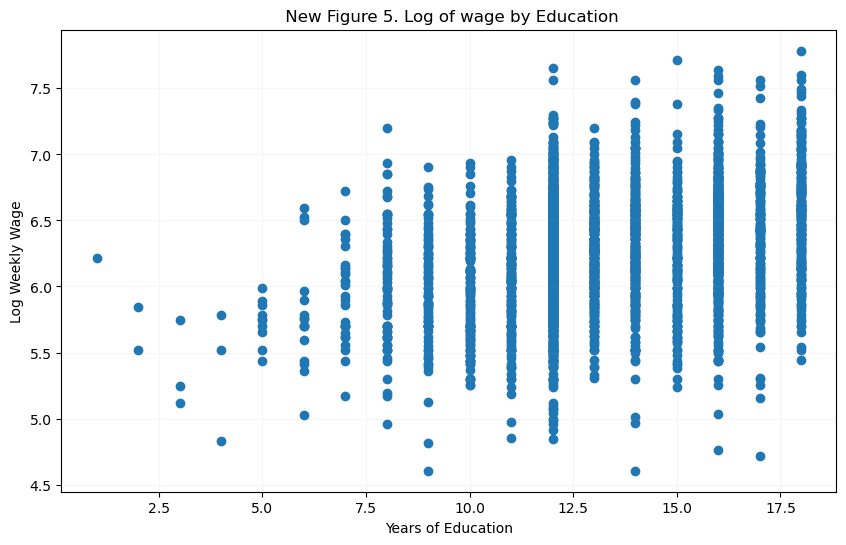

In [ ]:
# We are going to make a scatter plot of wage and educ
plt.figure(figsize=(10,6))
plt.scatter(returns['educ'], returns['lwage'])
plt.xlabel('Years of Education')
plt.ylabel('Log Weekly Wage')
plt.title(' New Figure 5. Log of wage by Education')
plt.grid(alpha=0.1)
plt.show()

## Regression 

In [ ]:
#we first modify the variables, we are going to make it dummy variables 1 for married and 0 for else
# method 1: map way
returns['married_1'] = returns['married'].map({1: 1}).fillna(0).astype(int)
# method 2: boolean way
returns['married_2'] = (returns['married'] == 1).astype(int)

In [ ]:
# Now we constract the regression models
model1 = smf.ols('lwage ~ educ', data=returns).fit()
model2 = smf.ols('lwage ~ educ + exper', data=returns).fit()
model3 = smf.ols('lwage ~ educ + exper + expersq', data=returns).fit()
model4 = smf.ols('lwage ~ educ + exper + expersq + married_1', data=returns).fit() 
model5 = smf.ols('lwage ~ educ + exper + expersq + married_1 + black', data=returns).fit()

In [ ]:
# Now we show the results with a table
sg = Stargazer([model1, model2, model3, model4, model5])
sg.title('Table 2. OLS Estimates of Returns to Schooling')
sg.custom_columns(['Spec 1','Spec 2','Spec 3','Spec 4','Spec 5'], [1,1,1,1,1])
display('Table2. OLS Estimates of Returns to Schooling')
display(HTML(sg.render_html()))


'Table2. OLS Estimates of Returns to Schooling'

## Looking thorugh the regression


<ul>
  <li><strong>Intercept (β₀&nbsp;≈ 4.670)</strong> – expected log weekly wage for a non‑Black, unmarried worker with zero schooling and zero experience. Mainly a baseline for the fitted surface.</li>
  <li><strong>Schooling (β₁&nbsp;≈ 0.080)</strong> – each additional year of education raises wages by about <strong>8 percent</strong>, holding other factors constant.</li>
  <li><strong>Experience (β₂&nbsp;≈ 0.080)</strong> – at career start (exper = 0) one extra year of experience lifts wages by roughly <strong>8 percent</strong>.</li>
  <li><strong>Experience² (β₃&nbsp;≈ −0.002)</strong> – negative curvature: each extra year trims the marginal gain from experience by 0.2 percentage‑points.</li>
  <li><strong>Married (β₄&nbsp;≈ 0.124)</strong> – being married with spouse present is linked to a <strong>12.4 percent wage premium</strong>.</li>
  <li><strong>Black (β₅&nbsp;≈ −0.214)</strong> – Black workers earn about <strong>21 percent less</strong> than comparable non‑Black workers after controls.</li>
</ul>
<p><strong>What changed from Specification 2 to 5?</strong></p>
<ul>
  <li>The schooling return falls from 9.3 % → 8.0 %, suggesting Spec 2 captured race/marital effects.</li>
  <li>The linear experience slope rises from 4.1 % → 8.0 %, but the squared term now tempers growth.</li>
  <li>Overall fit improves (R² 0.181 → 0.256).</li>
</ul>


In [ ]:
d_marginal_2 = model2.params['exper']
print("Spec 2 — ∂ln(wage)/∂exper:", d_marginal_2)

exper_vals = [0, 10, 17]
for e in exper_vals:
    marginal_effect = model3.params['exper'] + 2 * model3.params['expersq'] * e
    print(f"Spec 3 — ∂ln(wage)/∂exper at {e} years:", marginal_effect)

Spec 2 — ∂ln(wage)/∂exper: 0.04065736313964409
Spec 3 — ∂ln(wage)/∂exper at 0 years: 0.08978280173941569
Spec 3 — ∂ln(wage)/∂exper at 10 years: 0.040064042579135775
Spec 3 — ∂ln(wage)/∂exper at 17 years: 0.00526091116693983


<h3>How much does one more year of experience raise wages?</h3>
<ul>
  <li><strong>Specification 2</strong>: ∂ ln wage/∂ exper = β₂ ≈ 0.041 ⇒ <strong>4.1 %</strong> per year (constant).</li>
  <li><strong>Specification 3</strong>: ∂ ln wage/∂ exper = β₂ + 2β₃ exper = 0.090 − 0.004 exper.<br>
      &nbsp;&nbsp;• At 0 years: 9.0 %<br>
      &nbsp;&nbsp;• At 10 years: 4.0 %<br>
      &nbsp;&nbsp;• At mean experience (~17 years): 0.5 %</li>
</ul>
<p>The quadratic form shows steep early‑career gains that flatten—highlighting why the squared term matters.</p>


## Verify the properties of OLS



<h3>Algebraic properties of OLS</h3>
<ol>
  <li><strong>Zero‑mean residuals:</strong> &Sigma; ê<sub>i</sub> = 0.</li>
  <li><strong>Orthogonality with regressors:</strong> &Sigma; x<sub>ij</sub> ê<sub>i</sub> = 0 for each included regressor.</li>
</ol>
<p>Verification code shows sums on the order of 10<sup>−13</sup> for both Specification 1 and 5, confirming the properties.</p>


In [ ]:
resid_sum_1 = model1.resid.sum()
educ_orthog_1 = (returns['educ'] * model1.resid).sum()
resid_sum_5 = model5.resid.sum()
black_orthog_5 = (returns['black'] * model5.resid).sum()
print("Spec 1 — Residual sum:", resid_sum_1)
print("Spec 1 — educ × residuals sum:", educ_orthog_1)
print()
print("Spec 5 — Residual sum:", resid_sum_5)
print("Spec 5 — black × residuals sum:", black_orthog_5)

Spec 1 — Residual sum: 6.963318810448982e-12
Spec 1 — educ × residuals sum: 9.595169103704393e-11

Spec 5 — Residual sum: 8.432081699538685e-10
Spec 5 — black × residuals sum: 2.36830999256199e-10


<p> Numbers are extremely close to zero, confirming the properties <p>

For this assignment I used ai tool for the latex on html code.